
## Titanic Data Set Analysis and the Prediction on the Survival

In [148]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly 
import missingno
import plotly.express as px
import math, time, random, datetime

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

In [4]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Let's Get the Breif on the Each Column

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Jonsson, Mr. Carl",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
print("Data set has {} rows and {} columns".format(data.shape[0],data.shape[1]))

Data set has 891 rows and 12 columns


## Let's Start the Descriptive analysis on each column

### Find the Null Values

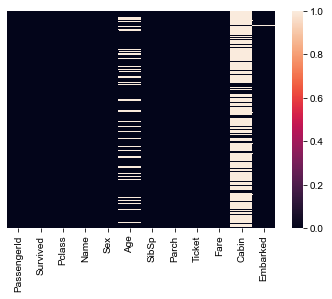

In [8]:
# Method 1: using the HeatMap from sns
sns.heatmap(data.isnull(), cbar=True,yticklabels=False)
sns.set(rc={'figure.figsize':(20,6)})

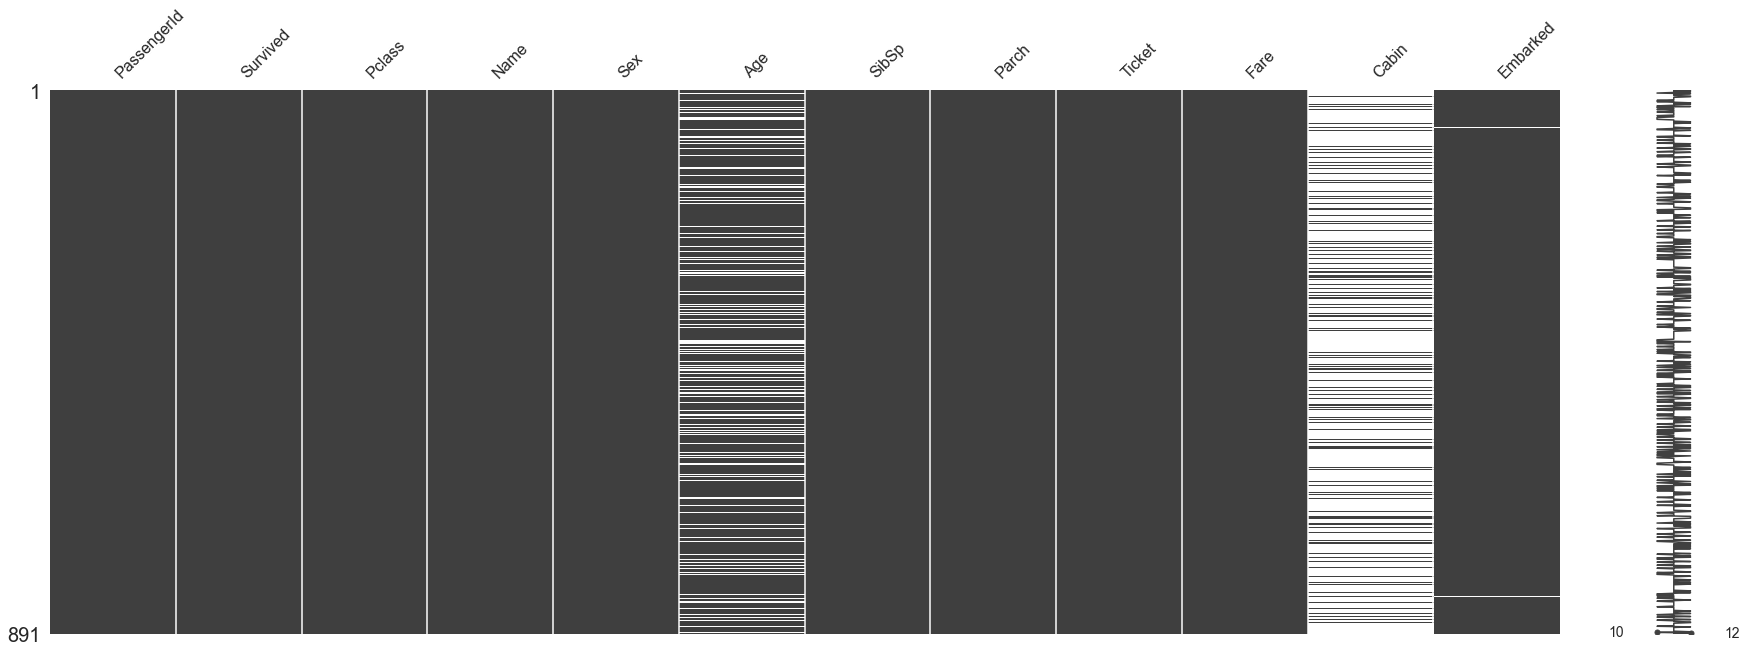

In [9]:
# Method 2
missingno.matrix(data,figsize=(30,10))

### From the above plot it is clear that we have null values in the Cabin and Age Columns, we can get the count of null values from the below code

In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Most of the Cabin Values are null, So we can drop the Cabin column by using the below code

In [11]:
data.drop('Cabin',axis=1, inplace=True) #axis =1 (Columns) & axis =0 (rows)

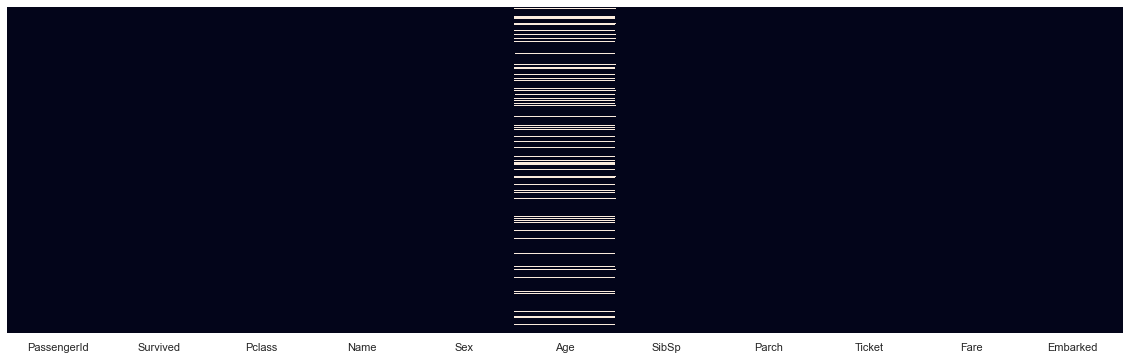

In [12]:
sns.heatmap(data.isnull(), cbar=False,yticklabels=False)

## Now that the Cabin column in dropped, lets work on the Age column

In [13]:
data['Age'].mean()

29.69911764705882

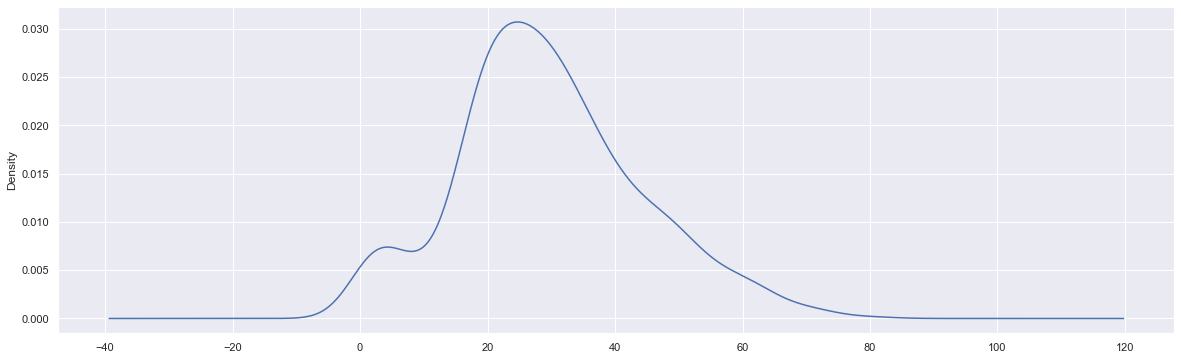

In [14]:
data['Age'].plot(kind='kde')

## From the above plot we can see that the most of the Age values lies in the average range.. So we can replace the null values with the Mean or Median based on the outliers

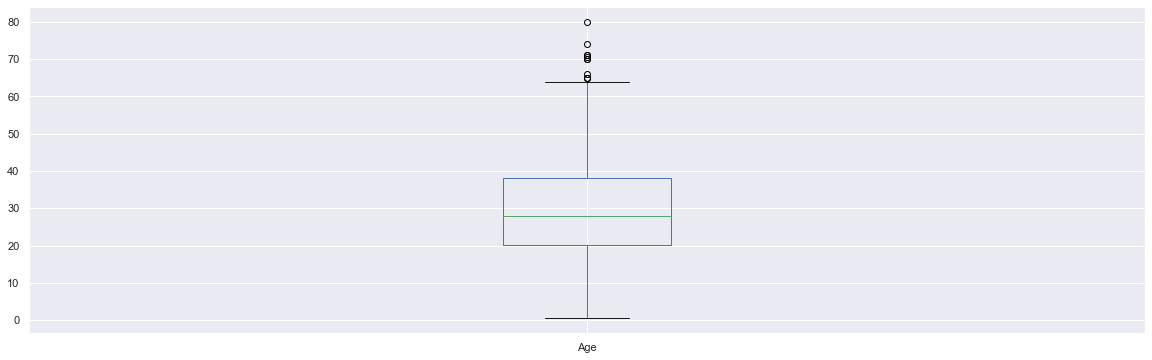

In [15]:
data['Age'].plot(kind='box') 

In [16]:
print(data['Age'].mean())
print(data['Age'].median())

29.69911764705882
28.0


#### There are some outliers in our data, we can prefer median over the Mean, So let''s replace the null values with the Median

In [17]:
data['Age'].fillna(int(data['Age'].median()), inplace= True)

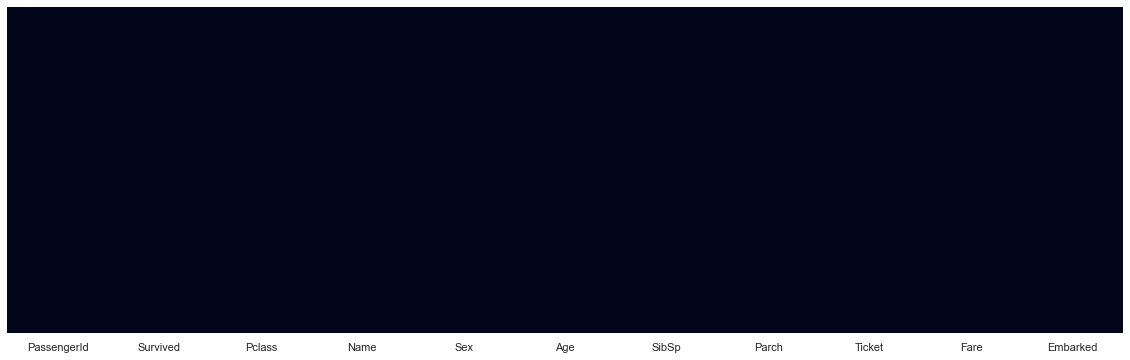

In [18]:
sns.heatmap(data.isnull(), cbar=False,yticklabels=False)

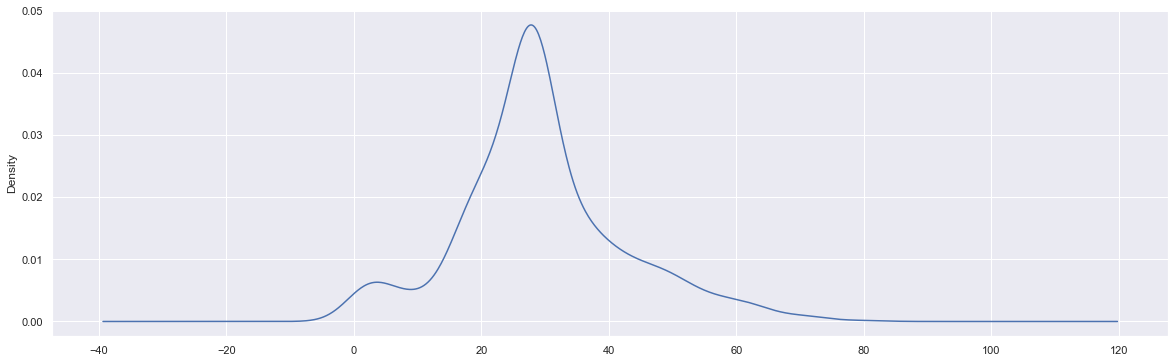

In [19]:
data['Age'].plot(kind='kde')

## And from the above plots it is clear that we handled the null values from both the columns

In [20]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

## Our Target variable is Survived. Rest all will be our Features

## Survived Target:

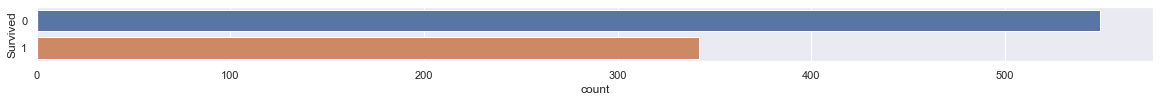

In [21]:
fig = plt.figure(figsize=(20,1))
sns.countplot(data=data,y='Survived')


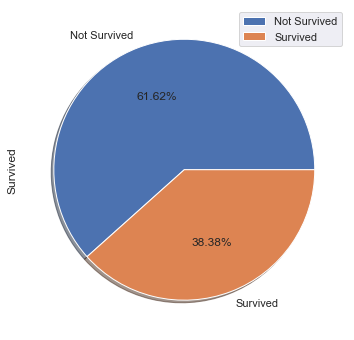

In [22]:
labels = ['Not Survived','Survived']
data['Survived'].value_counts().plot.pie(autopct="%.2f%%", shadow=True, labels=labels);
plt.legend()

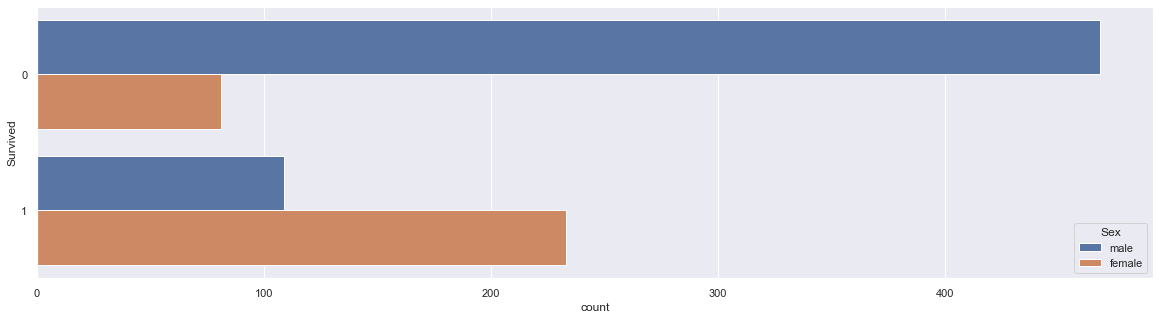

In [23]:
fig = plt.figure(figsize=(20,5))
sns.countplot(data=data,y='Survived',hue='Sex')

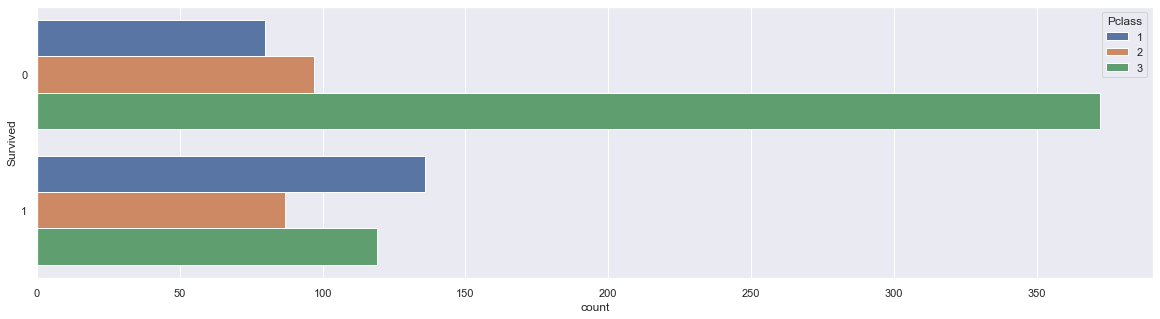

In [24]:
fig = plt.figure(figsize=(20,5))
sns.countplot(data=data,y='Survived',hue='Pclass')

### Feature: Pclass

* Here we have 3 classes, 1st 2nd & 3rd. let's see which class people are the more and the survied more


In [25]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [26]:
data['Pclass'].isnull().sum()

0

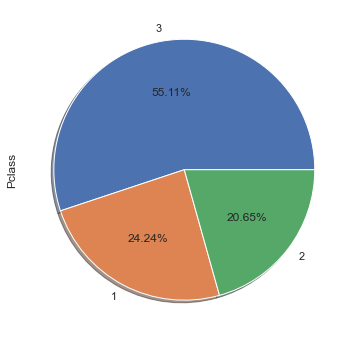

In [27]:
data['Pclass'].value_counts().plot.pie(autopct="%.2f%%", shadow = True)

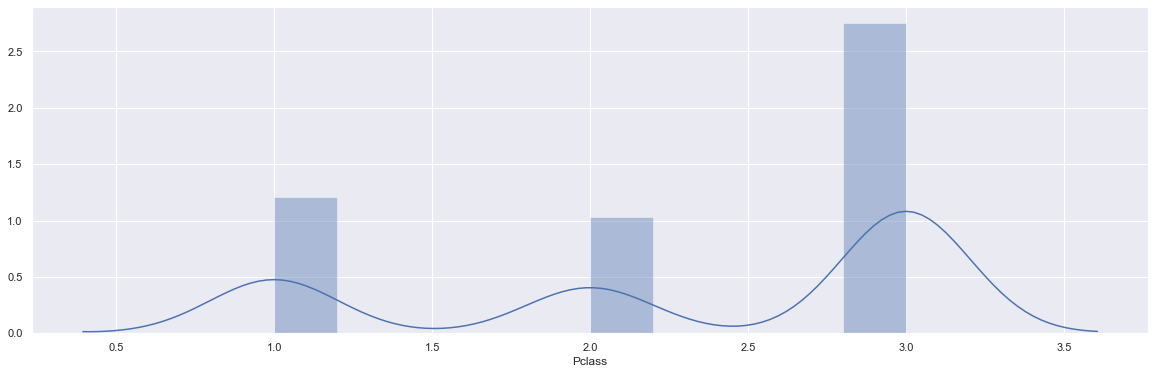

In [28]:
sns.distplot(data.Pclass)

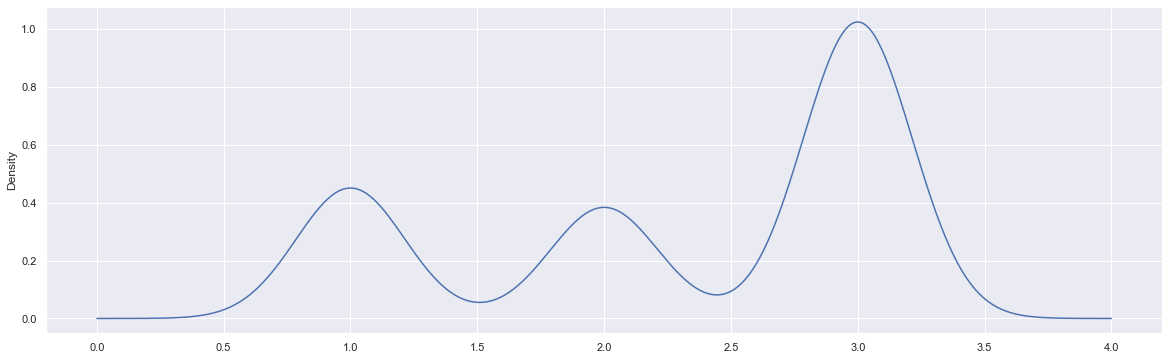

In [29]:
data['Pclass'].plot(kind='kde')

In [30]:
data['Pclass'].mean()

2.308641975308642

## From the above plots it is clear that we don't have any null values in the PClass Feature and the Major number of people are from 3rd Class Grop

# Feature: Name

In [31]:
len(data['Name'].unique())

891

## From the above point it is clear that we have 891 unique Names like the Passenger Id's, So we won't require the Name feature

# Feature: Sex

In [32]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

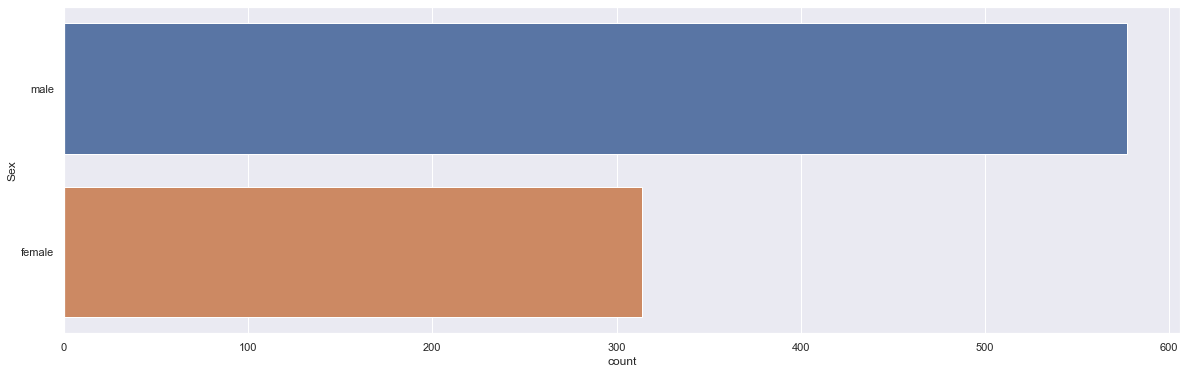

In [33]:
sns.countplot(data=data, y='Sex')

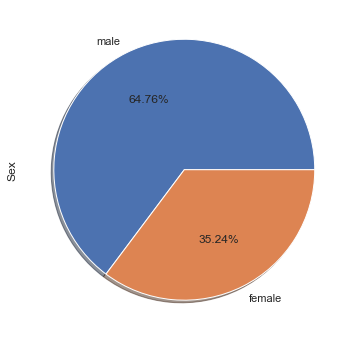

In [34]:
data['Sex'].value_counts().plot.pie(autopct="%.2f%%", shadow= True)

In [35]:
data['Sex'].isnull().sum()

0

In [36]:
## As sex is a categorical variable we need to change it to 1 or 0
data['Sex'] = np.where(data['Sex']=='female',0,1)

In [37]:
data['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

# Feature: Age

In [38]:
data['Age'].isnull().sum()

0

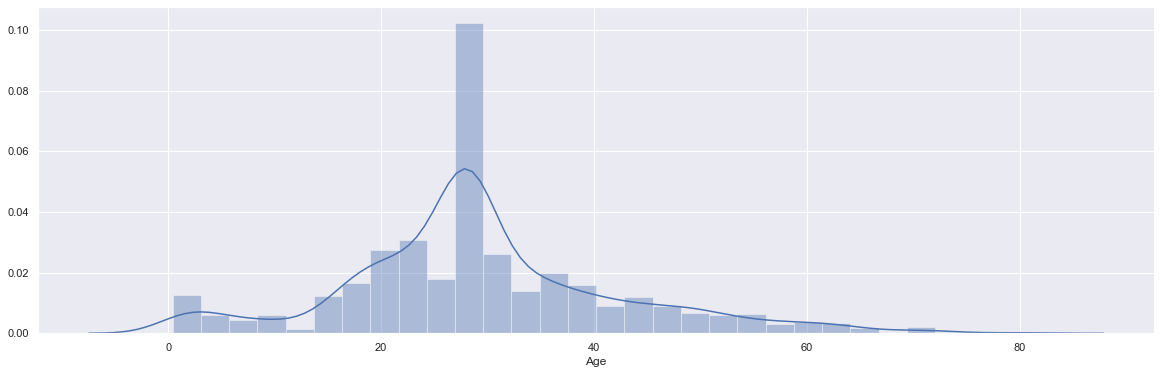

In [39]:
sns.distplot(data['Age'])

In [40]:
data['Age'].max()

80.0

In [41]:
data['Age'].min()

0.42

In [42]:
data['Age'].mean()

29.36158249158249

### The Data is mostly like a Normal distribution where the Max data is available at the Mean/Median range

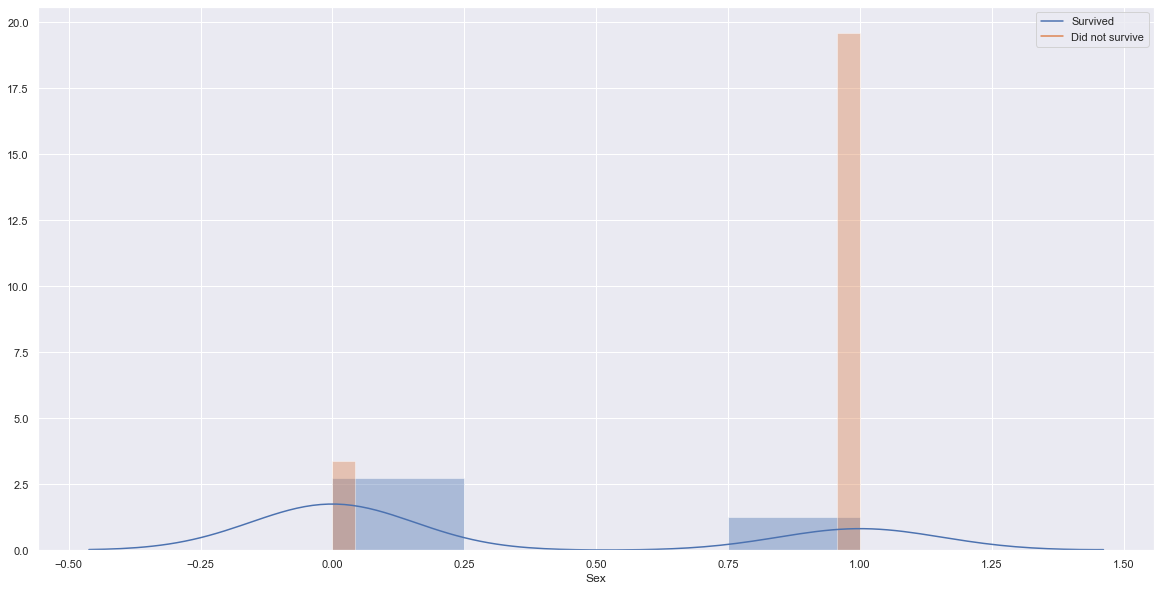

In [45]:
fig = plt.figure(figsize=(20, 10))
sns.distplot(data.loc[data['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'});
sns.distplot(data.loc[data['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'});

In [46]:
data[data['Survived'] == 1]['Sex'].value_counts()


0    233
1    109
Name: Sex, dtype: int64

In [47]:
data[data['Survived'] == 0]['Sex'].value_counts()

1    468
0     81
Name: Sex, dtype: int64

In [48]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


# Feature: Embarked

In [50]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

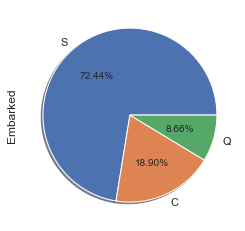

In [51]:
data['Embarked'].value_counts().plot.pie(autopct="%.2f%%",shadow=True)

In [52]:
data['Embarked'].isnull().sum()


2

In [53]:
data.shape

(891, 11)

In [54]:
trim_data=data.drop(['PassengerId','Name','Ticket'],axis=1)

In [55]:
trim_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


# Feature: Fare

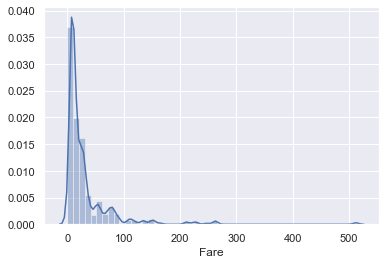

In [56]:
sns.distplot(data['Fare'])

In [57]:
print("Survied People Fare Mean ={} and Median ={}".format(data[data['Survived']==1]['Fare'].mean(),data[data['Survived']==1]['Fare'].median()))

Survied People Fare Mean =48.39540760233917 and Median =26.0


In [58]:

print("Died People Fare Mean ={} and Median ={}".format(data[data['Survived']==0]['Fare'].mean(),data[data['Survived']==0]['Fare'].median()))

Died People Fare Mean =22.117886885245877 and Median =10.5


* Mostly the fare part is the Parito distribution with the outliers


In [59]:
data['Fare'].median()

14.4542

In [60]:
data['Fare'].mean() ## Got impacted with the outliers

32.2042079685746

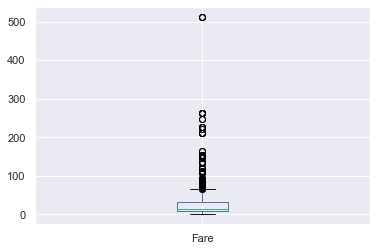

In [61]:
data['Fare'].plot(kind='box')

# Feature SibSp

In [62]:
trim_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

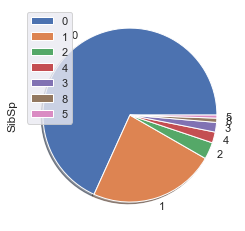

In [63]:
trim_data['SibSp'].value_counts().plot.pie(shadow=True)
plt.legend()

# Feature Parch

In [64]:
trim_data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

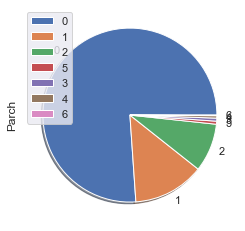

In [65]:
trim_data['Parch'].value_counts().plot.pie(shadow=True)
plt.legend()

In [66]:

##Data, Data Cleaning , EDA, Summary, ML - Preprocess -- Feature Engg- Encoding - Selecting Model -- Running- Evaluating- performance improvement -- overfit/underfit--predict-deployment


# Feature Engineering

In [67]:
trim_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [113]:
X = trim_data.iloc[:,1:].values
y=trim_data.iloc[:,0]

In [114]:
X

array([[3, 1, 22.0, ..., 0, 7.25, 'S'],
       [1, 0, 38.0, ..., 0, 71.2833, 'C'],
       [3, 0, 26.0, ..., 0, 7.925, 'S'],
       ...,
       [3, 0, 28.0, ..., 2, 23.45, 'S'],
       [1, 1, 26.0, ..., 0, 30.0, 'C'],
       [3, 1, 32.0, ..., 0, 7.75, 'Q']], dtype=object)

In [89]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [93]:
trim_data.rename(columns={'Sex':'Male'}, inplace =True)

In [94]:
trim_data.head()

,Survived,Pclass,Male,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


## Feature Encoding 

In [111]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

X

array([[2, 1, 22.0, ..., 0, 7.25, 'S'],
       [0, 0, 38.0, ..., 0, 71.2833, 'C'],
       [2, 0, 26.0, ..., 0, 7.925, 'S'],
       ...,
       [2, 0, 28.0, ..., 2, 23.45, 'S'],
       [0, 1, 26.0, ..., 0, 30.0, 'C'],
       [2, 1, 32.0, ..., 0, 7.75, 'Q']], dtype=object)

In [124]:
dummies_cls = pd.get_dummies(data.Pclass)
dummies_cls
dummies_Sib = pd.get_dummies(data.SibSp)
dummies_Emb = pd.get_dummies(data.Embarked)
data_mer=pd.concat([trim_data,dummies_cls,dummies_Sib,dummies_Emb],axis=1)
data_mer

,Survived,Pclass,Male,Age,SibSp,Parch,Fare,Embarked,1,2,...,0,1,2,3,4,5,8,C,Q,S
0,0,3,1,22.0,1,0,7.2500,S,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,C,1,0,...,0,1,0,0,0,0,0,1,0,0
2,1,3,0,26.0,0,0,7.9250,S,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,S,1,0,...,0,1,0,0,0,0,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,S,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,0,1,...,1,0,0,0,0,0,0,0,0,1
887,1,1,0,19.0,0,0,30.0000,S,1,0,...,1,0,0,0,0,0,0,0,0,1
888,0,3,0,28.0,1,2,23.4500,S,0,0,...,0,1,0,0,0,0,0,0,0,1
889,1,1,1,26.0,0,0,30.0000,C,1,0,...,1,0,0,0,0,0,0,1,0,0


In [131]:
data_mer.drop(['Pclass','SibSp','Embarked','S'], axis=1, inplace=True)
data_mer.drop([2],axis=1,inplace=True)

In [132]:
data_mer.head()

,Survived,Male,Age,Parch,Fare,1,3,0,1,3,4,5,8,C,Q
0,0,1,22.0,0,7.2500,0,1,0,1,0,0,0,0,0,0
1,1,0,38.0,0,71.2833,1,0,0,1,0,0,0,0,1,0
2,1,0,26.0,0,7.9250,0,1,1,0,0,0,0,0,0,0
3,1,0,35.0,0,53.1000,1,0,0,1,0,0,0,0,0,0
4,0,1,35.0,0,8.0500,0,1,1,0,0,0,0,0,0,0


In [157]:
X_train=data_mer.iloc[:,1:].values
y_train=data_mer.iloc[:,0]

In [158]:
X_train

array([[ 1., 22.,  0., ...,  0.,  0.,  0.],
       [ 0., 38.,  0., ...,  0.,  1.,  0.],
       [ 0., 26.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0., 28.,  2., ...,  0.,  0.,  0.],
       [ 1., 26.,  0., ...,  0.,  1.,  0.],
       [ 1., 32.,  0., ...,  0.,  0.,  1.]])

In [159]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Model Building

In [160]:
# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

In [161]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

## Logistic Regression¶


In [162]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 81.48
Accuracy CV 10-Fold: 80.36
Running Time: 0:00:00.286888


### K-Nearest Neighbours¶

In [163]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 80.02
Accuracy CV 10-Fold: 69.47
Running Time: 0:00:00.123877


### Gaussian Naive Bayes

In [164]:

# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 42.09
Accuracy CV 10-Fold: 41.86
Running Time: 0:00:00.047892


### Linear Support Vector Machines (SVC)

In [166]:

# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 77.33
Accuracy CV 10-Fold: 75.87
Running Time: 0:00:00.266958


### Stochastic Gradient Descent

In [169]:

# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 50.62
Accuracy CV 10-Fold: 69.58
Running Time: 0:00:00.263001



### Decision Tree Classifier

In [170]:

# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 97.98
Accuracy CV 10-Fold: 79.35
Running Time: 0:00:00.503173



### Gradient Boosting Trees

In [171]:

# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 89.79
Accuracy CV 10-Fold: 83.28
Running Time: 0:00:01.986408


### Regular accuracy scores¶

In [173]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt
    ]})
print("---Regular Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Regular Accuracy Scores---


,Model,Score
5,Decision Tree,97.98
6,Gradient Boosting Trees,89.79
1,Logistic Regression,81.48
0,KNN,80.02
4,Linear SVC,77.33
3,Stochastic Gradient Decent,50.62
2,Naive Bayes,42.09


In [174]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
6,Gradient Boosting Trees,83.28
1,Logistic Regression,80.36
5,Decision Tree,79.35
4,Linear SVC,75.87
3,Stochastic Gradient Decent,69.58
0,KNN,69.47
2,Naive Bayes,41.86


In [175]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp

In [181]:
# Plot the feature importance scores
feature_importance(train_pred_svc, X_train)

AttributeError: 'numpy.ndarray' object has no attribute 'feature_importances_'